In [1]:
from datetime import *

In [2]:
a=datetime.now()
a

datetime.datetime(2020, 7, 7, 7, 6, 25, 840045)

# converting into string format

In [3]:
a.strftime("%d-%B-%Y")

'07-July-2020'

In [4]:
b="20-July-2020"

In [5]:
d=datetime.strptime(b,"%d-%b-%Y")
d

ValueError: time data '20-July-2020' does not match format '%d-%b-%Y'

In [6]:
import pandas as pd

In [7]:
a=pd.date_range(" 06 July 2020",periods=10,freq="D")
a

DatetimeIndex(['2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df=pd.read_excel("C:\\Users\\krishna\\Desktop\\Foreign_Exchange_Rates.xls")
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [9]:
dff=pd.DataFrame(df,columns=['Time Serie','INDIA - INDIAN RUPEE/US$'])
dff

,Time Serie,INDIA - INDIAN RUPEE/US$
0,2000-01-03,43.55
1,2000-01-04,43.55
2,2000-01-05,43.55
3,2000-01-06,43.55
4,2000-01-07,43.55
...,...,...
5212,2019-12-25,ND
5213,2019-12-26,71.28
5214,2019-12-27,71.45
5215,2019-12-30,71.3


In [ ]:
dff['']

In [10]:
dff.isnull().any()

Time Serie                  False
INDIA - INDIAN RUPEE/US$    False
dtype: bool

In [11]:
dff=dff.set_index('Time Serie')
dff

,INDIA - INDIAN RUPEE/US$
Time Serie,
2000-01-03,43.55
2000-01-04,43.55
2000-01-05,43.55
2000-01-06,43.55
2000-01-07,43.55
...,...
2019-12-25,ND
2019-12-26,71.28
2019-12-27,71.45


In [13]:
import numpy as np

In [ ]:
z=dff['INDIA - INDIAN RUPEE/US$'].resample('M').mean()
z.Index

In [15]:
import matplotlib.pyplot as plt

ValueError: could not convert string to float: 'ND'

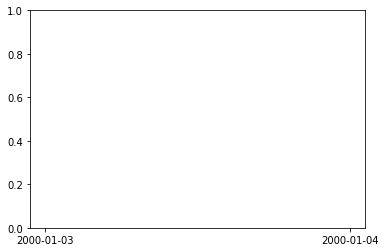

In [16]:
plt.plot(dff)
plt.show()

In [ ]:
import statsmodels.api as sm

# we can observe different seasonal trends by using rcparams

In [ ]:
from pylab import rcParams
rcParams['fig.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(dff,model="additive")
fig=decomposition.plot()
plt.show()

# sales for every quarter

In [17]:
z=dff['INDIA - INDIAN RUPEE/US$'].resample('Q').sum()
z.Index

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

# sales for every year

In [18]:
z=dff['INDIA - INDIAN RUPEE/US$'].resample('Y').sum()
z.Index

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'